# EDA


In [10]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import re
from nltk.corpus import stopwords 
import seaborn as sns

In [2]:
reading_metadata = pd.read_csv("./metadata.csv")

In [3]:
title_list = []
for i in reading_metadata['title']:
    title_list.append(i)

In [4]:
len(title_list)

44220

In [5]:
words_list = []
for i in tqdm(title_list):
#     print(i)
    words = str(i).split(" ")
    for j in words:
        words_list.append(j.lower())

100%|██████████| 44220/44220 [00:00<00:00, 103482.46it/s]


In [6]:
print('Number of words in text file :', len(words_list))

Number of words in text file : 545436


In [7]:
stop_words = set(stopwords.words('english'))
filtered = []
for w in tqdm(words_list): 
    if w not in stop_words: 
        filtered.append(w) 

100%|██████████| 545436/545436 [00:00<00:00, 849738.42it/s]


In [8]:
frequency_dictionary = {} 
  
for keys in tqdm(filtered): 
    frequency_dictionary[keys] = frequency_dictionary.get(keys, 0) + 1

100%|██████████| 401569/401569 [00:00<00:00, 1096184.26it/s]


In [41]:
word_counts = Counter(filtered)
w = word_counts.most_common(10)

In [42]:
list_of_words = []
list_of_counts = []
for i in w:
    list_of_words.append(i[0])
    list_of_counts.append(i[1])

In [43]:
title_df = pd.DataFrame({
    'text': list_of_words,
    'count': list_of_counts
})

Text(0, 0.5, 'Count')

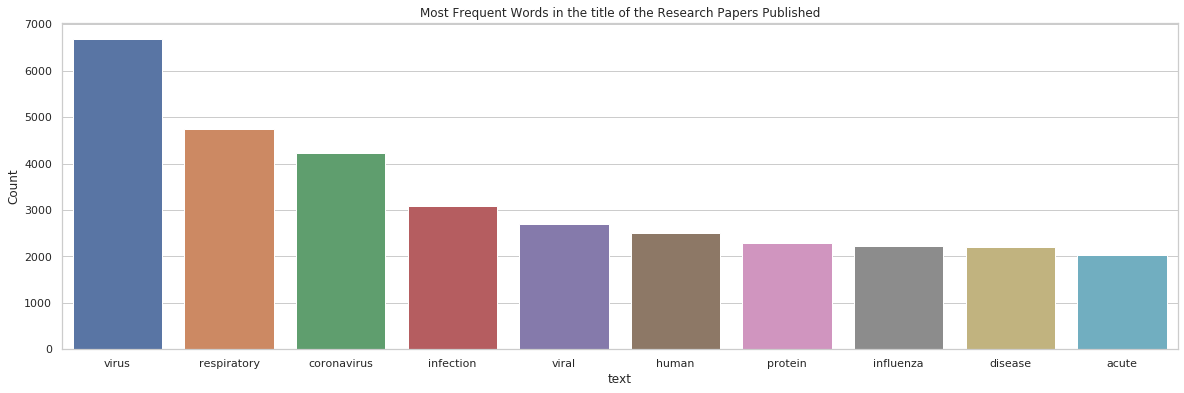

In [44]:
plt.figure(figsize=(20,6))

# Add title
plt.title("Most Frequent Words in the title of the Research Papers Published")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=title_df['text'], y=title_df['count'])

# Add label for vertical axis
plt.ylabel("Count")